# CEE 201: Linear Programming with Jupyter Notebooks

## Graphing the LP

In [29]:
# Import python libraries numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Decision Variables
Our objective is to determine the optimal values of $x$ and $y$ that maximize the objective function of this LP.

### Objective function

We want to find the maximum solution to the objective function: \
$Z = 4x+3y$.

### Constraints
The objective function is subject to the following constraints: \
$x \geq 0 $ \
$y \geq 2 $ \
$2y \leq 25-x$ \
$4y \geq 2x-8$ \
$y \leq 2x-5$ 

We begin our analysis with graphing our problem. First, under the assumption that all constraints are binding (all are equality constraints) we create the following:

In [5]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

Then, we construct our plot using the above equations:

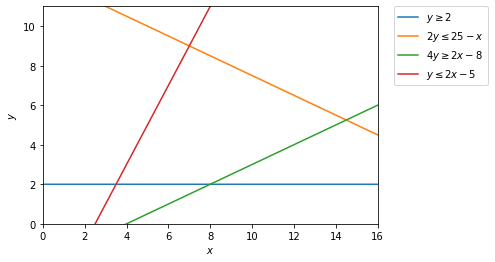

In [7]:
# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Then, we fill the feasible region in accordance to the constrains inequalities:

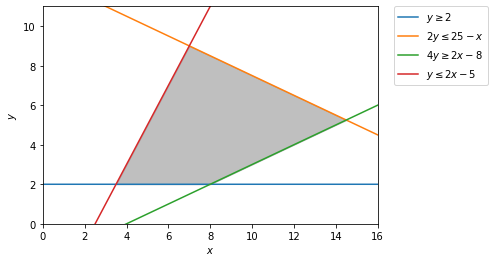

In [9]:
# Fill feasible region
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Our solution lies somewhere in the grey feasible region in the graph above.\
\
It has been proven that the minima and maxima of linear programming problems lie at the vertices of the feasible region. In this example, there are only 4 corners to our feasible region, so we can find the solutions for each corner to find our maximum. \
\
We need to examine the value of the objective function $Z$ at the 4 corners, which are the intersections of the following equations: 


| Line 1      | Line 2      |
|-------------|-------------|
| y ≥ 2       | 4y ≥ 2x – 8 |
| 2y ≤ 25 – x | y ≤ 2x – 5  |
| 2y ≤ 25 – x | 4y ≥ 2x – 8 |
| y ≥ 2       | y ≤ 2x – 5  |


Once again, our objective is to maximize:
$Z=4x+3y$, thus we calculate $Z$ for each corner:

**Corner 1**:\
$y≥2$ and $4y≥2x–8$\
$2=\frac{2x–8}{4}$ and $x=8, y=2$ and $Z=(4×8+3×2)=38$

**Corner 2**:\
$2y≤25–x$ and $y≤2x–5$ \
$\frac{25–x}{2}=2x–5$ \
$x=7, y=9$ and $Z=(4×7+3×9)=55$

**Corner 3**:\
$2y≤25–x$ and $4y\geq2x–8$ \
$\frac{25–x}{2}=\frac{2x–8}{4}$ \
$x=14.5, y=5.25$ and $Z=(4×14.5+3×5.25)=73.75$

**Corner 4**:\
$y≥2$ and $y≤2x–5$\
$2=2x–5$ and $x=3.5, y=2$ then $Z=(4×3.5+3×2)=20$

Thus the maximum $Z$ is for $x=14.5, y=5.25$ with $Z=73.75$

## Using PuLP to solve the LP

PuLP is a python package for solving LP problems. \
It assists us with constructing and solving linear programming problems.

In [1]:
# Import python package PuLP
import pulp

Define an LP problem class using "My LP problem" convention. If we seeking to maximize an objective function we use LpMaximize, otherwise LpMinimize.

In [2]:
my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)

We use LpVariable class to model our decision variables.Upper bounds are denoted with the upBound parameter and lower bound with the lowBound papameter.

In [3]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

The objective function and constraints are added using the **+=** operator to the model. The objective function **Z** is added first and then we add the constraints.

In [4]:
# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

# Constraints
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem += y <= 2 * x - 5

Let's take a look at the way that the problem was coded:

In [10]:
my_lp_problem

My LP Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

PuLP is supporting solvers that are open source (default is [Coin Brunch and Cut](https://projects.coin-or.org/Cbc)) as well as proprietary, commercial solvers (like [Gurobi](https://www.gurobi.com) and [CPLEX](https://www.ibm.com/products/ilog-cplex-optimization-studio)).

We call the solver to find the solution to our problem:

In [11]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

The LpStatus outcome could be:
* optimal 
* not solved
* infeasible (no feasible solution)
* unbounded (constraints are not bounded and solution tend to approach infinity when maximizing)
* undefined (optimal solution may exist but was not found)

The optimal values of $x$ and $y$ are:

In [24]:
#Print decision variables
print(" x = {}".format(x.varValue))
print(" y = {}".format(y.varValue))

 x = 14.5
 y = 5.25


In [28]:
#Print objective function value (max Z)
print(pulp.value(my_lp_problem.objective))

73.75


We arrived to the same conclusion - compare the solution to the graphical one- using a python solver.